In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("UrbanSound8K.csv")

In [3]:
print(df.head())
print(df.info())


      slice_file_name    fsID  start        end  salience  fold  classID  \
0    100032-3-0-0.wav  100032    0.0   0.317551         1     5        3   
1  100263-2-0-117.wav  100263   58.5  62.500000         1     5        2   
2  100263-2-0-121.wav  100263   60.5  64.500000         1     5        2   
3  100263-2-0-126.wav  100263   63.0  67.000000         1     5        2   
4  100263-2-0-137.wav  100263   68.5  72.500000         1     5        2   

              class  
0          dog_bark  
1  children_playing  
2  children_playing  
3  children_playing  
4  children_playing  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8732 entries, 0 to 8731
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   slice_file_name  8732 non-null   object 
 1   fsID             8732 non-null   int64  
 2   start            8732 non-null   float64
 3   end              8732 non-null   float64
 4   salience         8732 no

In [4]:
print("Columns:", df.columns.tolist())
print("First 5 rows:\n", df.head(), "\n")

Columns: ['slice_file_name', 'fsID', 'start', 'end', 'salience', 'fold', 'classID', 'class']
First 5 rows:
       slice_file_name    fsID  start        end  salience  fold  classID  \
0    100032-3-0-0.wav  100032    0.0   0.317551         1     5        3   
1  100263-2-0-117.wav  100263   58.5  62.500000         1     5        2   
2  100263-2-0-121.wav  100263   60.5  64.500000         1     5        2   
3  100263-2-0-126.wav  100263   63.0  67.000000         1     5        2   
4  100263-2-0-137.wav  100263   68.5  72.500000         1     5        2   

              class  
0          dog_bark  
1  children_playing  
2  children_playing  
3  children_playing  
4  children_playing   



In [5]:
df.columns = df.columns.str.strip()

In [6]:
for col in ["start", "end", "salience", "fold", "classID"]:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")


In [7]:
before = len(df)
df = df.dropna(subset=["start", "end"])
after = len(df)
print(f"Dropped {before - after} rows with missing start/end.")

Dropped 0 rows with missing start/end.


In [8]:
df["duration"] = df["end"] - df["start"]


In [9]:
before = len(df)
df = df[df["duration"] > 0]
after = len(df)
print(f"Removed {before - after} rows with non-positive duration.")

Removed 0 rows with non-positive duration.


In [10]:
dups = df.duplicated().sum()
print(f"Duplicate rows before removal: {dups}")
if dups > 0:
    df = df.drop_duplicates()

Duplicate rows before removal: 0


In [11]:
df.to_csv("UrbanSound8K_cleaned.csv", index=False)
print("Saved cleaned dataset -> UrbanSound8K_cleaned.csv")


Saved cleaned dataset -> UrbanSound8K_cleaned.csv


In [12]:
print("\nBasic stats (numeric columns):\n", df.describe())


Basic stats (numeric columns):
                 fsID        start          end     salience         fold  \
count    8732.000000  8732.000000  8732.000000  8732.000000  8732.000000   
mean   116033.493816    38.645409    42.253312     1.347000     5.385937   
std     57991.017218    74.292126    74.369669     0.476043     2.846820   
min       344.000000     0.000000     0.105962     1.000000     1.000000   
25%     69942.250000     3.000000     6.839398     1.000000     3.000000   
50%    118279.000000    10.376492    14.000000     1.000000     5.000000   
75%    166942.000000    35.131372    38.866979     2.000000     8.000000   
max    209992.000000   600.125356   604.125356     2.000000    10.000000   

           classID     duration  
count  8732.000000  8732.000000  
mean      4.592877     3.607904  
std       2.894544     0.973570  
min       0.000000     0.054517  
25%       2.000000     4.000000  
50%       4.000000     4.000000  
75%       7.000000     4.000000  
max       

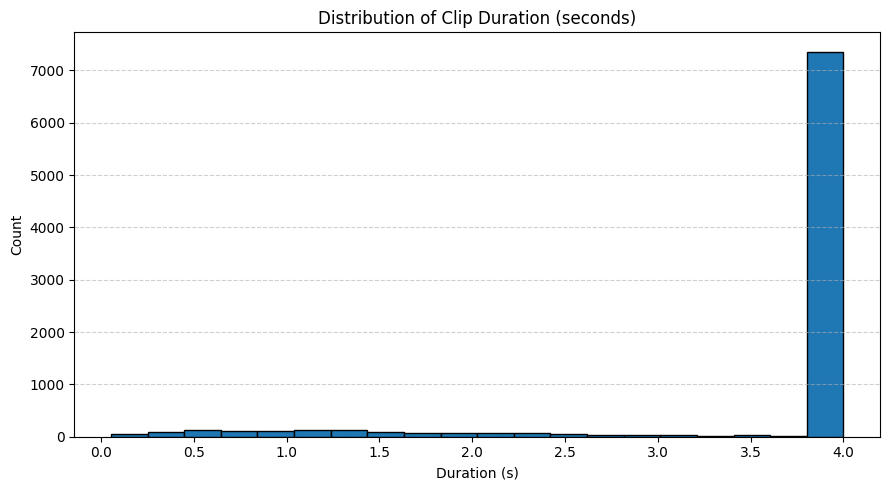

In [13]:
plt.figure(figsize=(9,5))
plt.hist(df["duration"], bins=20, edgecolor="black")
plt.title("Distribution of Clip Duration (seconds)")
plt.xlabel("Duration (s)")
plt.ylabel("Count")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

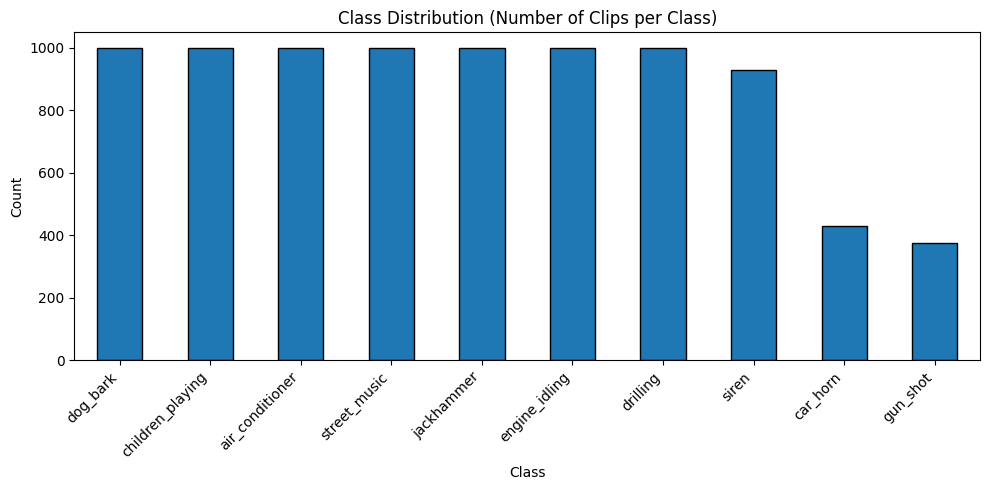

In [14]:
class_counts = df["class"].value_counts().sort_values(ascending=False)
plt.figure(figsize=(10,5))
class_counts.plot(kind="bar", edgecolor="black")
plt.title("Class Distribution (Number of Clips per Class)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

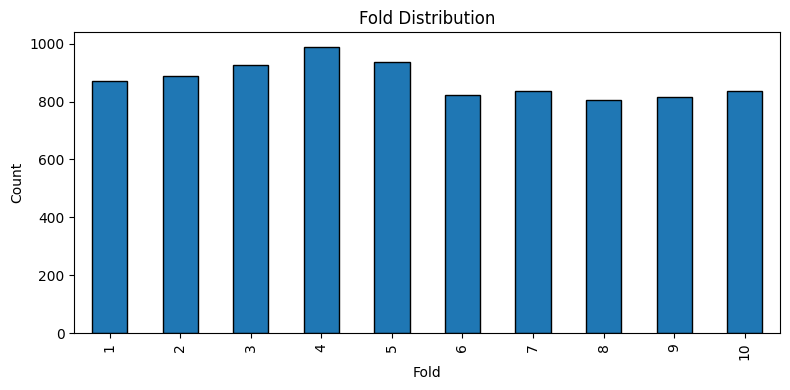

In [15]:
if "fold" in df.columns:
    fold_counts = df["fold"].value_counts().sort_index()
    plt.figure(figsize=(8,4))
    fold_counts.plot(kind="bar", edgecolor="black")
    plt.title("Fold Distribution")
    plt.xlabel("Fold")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

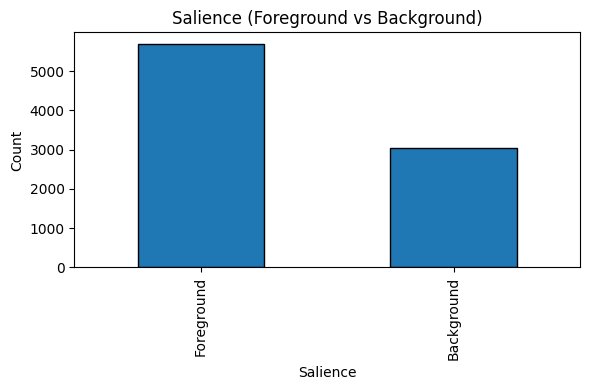

In [16]:
if "salience" in df.columns:
    sal_map = {1: "Foreground", 2: "Background"}
    sal_counts = df["salience"].map(sal_map).value_counts()
    plt.figure(figsize=(6,4))
    sal_counts.plot(kind="bar", edgecolor="black")
    plt.title("Salience (Foreground vs Background)")
    plt.xlabel("Salience")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

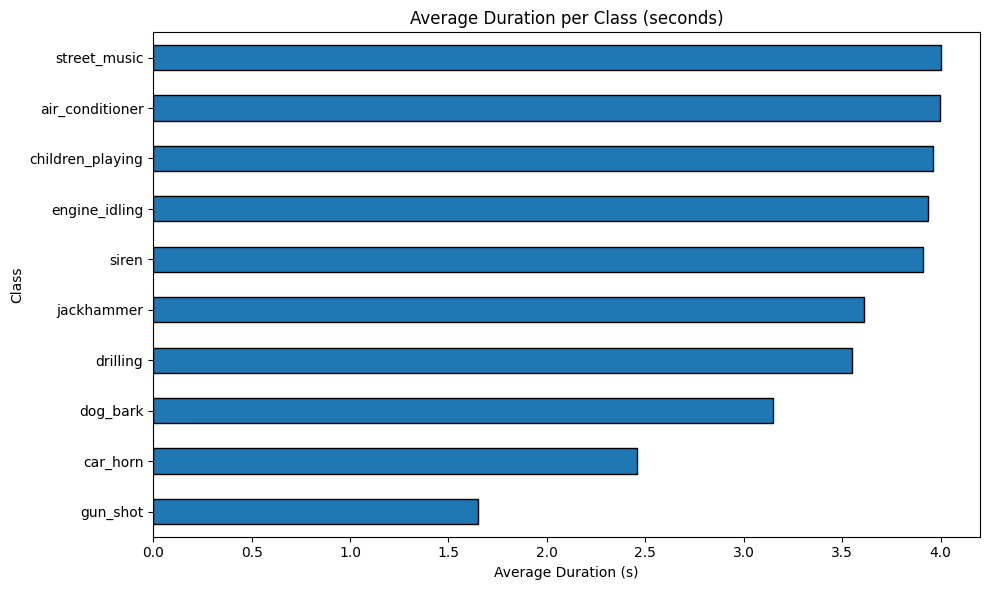

In [17]:
avg_dur_by_class = df.groupby("class")["duration"].mean().sort_values()
plt.figure(figsize=(10,6))
avg_dur_by_class.plot(kind="barh", edgecolor="black")
plt.title("Average Duration per Class (seconds)")
plt.xlabel("Average Duration (s)")
plt.ylabel("Class")
plt.tight_layout()
plt.show()

<Figure size 1100x600 with 0 Axes>

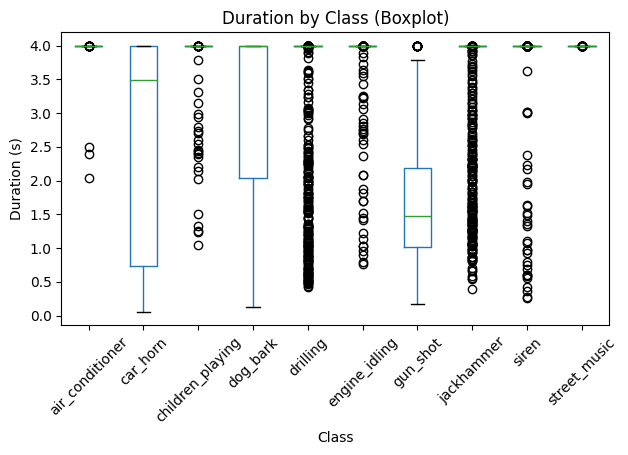

In [18]:
plt.figure(figsize=(11,6))
# pandas boxplot uses matplotlib under the hood
df.boxplot(column="duration", by="class", grid=False, rot=45)
plt.suptitle("")  # remove default pandas title
plt.title("Duration by Class (Boxplot)")
plt.xlabel("Class")
plt.ylabel("Duration (s)")
plt.tight_layout()
plt.show()

//step2 or week2 :feature extraction process

In [2]:
import librosa
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
def extract_features(file_path):
    try:
        # Load audio file
        audio, sr = librosa.load(file_path, res_type='kaiser_fast')
        
        # Extract MFCCs (Mel-frequency cepstral coefficients)
        mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=40)
        mfccs_scaled = np.mean(mfccs.T, axis=0)
        
        return mfccs_scaled
    except Exception as e:
        print(f"Error encountered while parsing file: {file_path}, {e}")
        return None

In [15]:
import os
import pandas as pd

# Path to extracted audio folder (fold1, fold2, ...)
audio_dataset_path = r"C:\Users\meher\OneDrive\Desktop\internship project\week1\archive"

# Path to CSV (adjust name if using UrbanSound8K_cleaned.csv instead)
metadata = pd.read_csv(r"C:\Users\meher\OneDrive\Desktop\internship project\week1\UrbanSound8K.csv")

print(metadata.head())


      slice_file_name    fsID  start        end  salience  fold  classID  \
0    100032-3-0-0.wav  100032    0.0   0.317551         1     5        3   
1  100263-2-0-117.wav  100263   58.5  62.500000         1     5        2   
2  100263-2-0-121.wav  100263   60.5  64.500000         1     5        2   
3  100263-2-0-126.wav  100263   63.0  67.000000         1     5        2   
4  100263-2-0-137.wav  100263   68.5  72.500000         1     5        2   

              class  
0          dog_bark  
1  children_playing  
2  children_playing  
3  children_playing  
4  children_playing  


In [11]:
import os

# test path
audio_dataset_path = r"C:\Users\meher\OneDrive\Desktop\internship project\UrbanSound8K\audio"

# print first file path to check
row = metadata.iloc[0]  # first row
test_file = os.path.join(audio_dataset_path, "fold" + str(row["fold"]), row["slice_file_name"])
print("Test file path:", test_file)
print("Exists?", os.path.exists(test_file))


Test file path: C:\Users\meher\OneDrive\Desktop\internship project\UrbanSound8K\audio\fold5\100032-3-0-0.wav
Exists? False


In [16]:
features = []
labels = []


//feature extraction function

In [17]:
import librosa
import numpy as np

def extract_features(file_path):
    try:
        # Load audio file
        audio, sr = librosa.load(file_path, res_type='kaiser_fast')
        
        # Extract MFCCs (Mel-frequency cepstral coefficients)
        mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=40)
        mfccs_scaled = np.mean(mfccs.T, axis=0)  # take mean across time axis
        
        return mfccs_scaled
    except Exception as e:
        print(f"Error with {file_path}: {e}")
        return None


In [22]:
import sys
print(sys.executable)
!{sys.executable} -m pip show resampy



c:\Users\meher\AppData\Local\Programs\Python\Python313\python.exe
Name: resampy
Version: 0.4.3
Summary: Efficient signal resampling
Home-page: https://github.com/bmcfee/resampy
Author: Brian McFee
Author-email: brian.mcfee@nyu.edu
License: ISC
Location: c:\Users\meher\AppData\Local\Programs\Python\Python313\Lib\site-packages
Requires: numba, numpy
Required-by: 


In [23]:
!{sys.executable} -m pip install --upgrade librosa resampy


In [25]:
!pip install resampy --upgrade --quiet


In [1]:
import librosa
import numpy as np

def extract_features(file_path):
    try:
        audio, sr = librosa.load(file_path, res_type='kaiser_fast')
        mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=40)
        mfccs_scaled = np.mean(mfccs.T, axis=0)
        return mfccs_scaled
    except Exception as e:
        print(f"Error with {file_path}: {e}")
        return None

test_file = r"C:\Users\meher\OneDrive\Desktop\internship project\week1\archive\fold5\100032-3-0-0.wav"
features = extract_features(test_file)
print(features)


[-217.35526      70.22339    -130.38527     -53.282898    -21.19913
  -22.677622    -10.855971     18.294256      6.652703     14.324025
  -12.167682      2.2768373   -17.77919      10.388949     -6.582836
   -0.6944574   -18.336023      1.9942534    -5.1433306     8.3024
  -12.645056     -6.5297318     4.617667     -2.1799166    -6.6628237
    0.35971144   -3.9084098     4.7756243    -6.3845215    -5.3798175
    0.915978      6.9704933    -0.24866833    1.678219     -5.611181
   -2.964346      3.1490579    -1.6930535    -0.61698353    0.38600513]


In [4]:
import pandas as pd
import os

# Path to dataset
audio_dataset_path = r"C:\Users\meher\OneDrive\Desktop\internship project\week1\archive"

# Load metadata CSV
metadata = pd.read_csv(os.path.join(audio_dataset_path, "UrbanSound8K.csv"))

# Preview metadata
print(metadata.head())


      slice_file_name    fsID  start        end  salience  fold  classID  \
0    100032-3-0-0.wav  100032    0.0   0.317551         1     5        3   
1  100263-2-0-117.wav  100263   58.5  62.500000         1     5        2   
2  100263-2-0-121.wav  100263   60.5  64.500000         1     5        2   
3  100263-2-0-126.wav  100263   63.0  67.000000         1     5        2   
4  100263-2-0-137.wav  100263   68.5  72.500000         1     5        2   

              class  
0          dog_bark  
1  children_playing  
2  children_playing  
3  children_playing  
4  children_playing  


In [5]:
features = []
labels = []

for index, row in metadata.iterrows():
    file_name = os.path.join(audio_dataset_path, "fold" + str(row["fold"]), row["slice_file_name"])
    data = extract_features(file_name)
    
    if data is not None:
        features.append(data)
        labels.append(row["class"])

print("✅ Feature extraction completed")
print("Total samples:", len(features))


c:\Users\meher\AppData\Local\Programs\Python\Python313\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
c:\Users\meher\AppData\Local\Programs\Python\Python313\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
c:\Users\meher\AppData\Local\Programs\Python\Python313\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(


✅ Feature extraction completed
Total samples: 8732


In [8]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Convert features and labels to numpy arrays
X = np.array(features)
y = np.array(labels)

# Encode class labels (convert text labels to numbers)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Train Random Forest model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print("✅ Random Forest Accuracy:", acc)


✅ Random Forest Accuracy: 0.8952489982827705


In [11]:
!pip install seaborn



📊 Classification Report:

                  precision    recall  f1-score   support

 air_conditioner       0.96      0.95      0.96       203
        car_horn       0.96      0.80      0.87        86
children_playing       0.75      0.86      0.80       183
        dog_bark       0.87      0.87      0.87       201
        drilling       0.91      0.86      0.89       206
   engine_idling       0.96      0.99      0.97       193
        gun_shot       1.00      0.79      0.88        72
      jackhammer       0.91      0.95      0.93       208
           siren       0.93      0.98      0.95       165
    street_music       0.84      0.80      0.82       230

        accuracy                           0.90      1747
       macro avg       0.91      0.89      0.89      1747
    weighted avg       0.90      0.90      0.90      1747



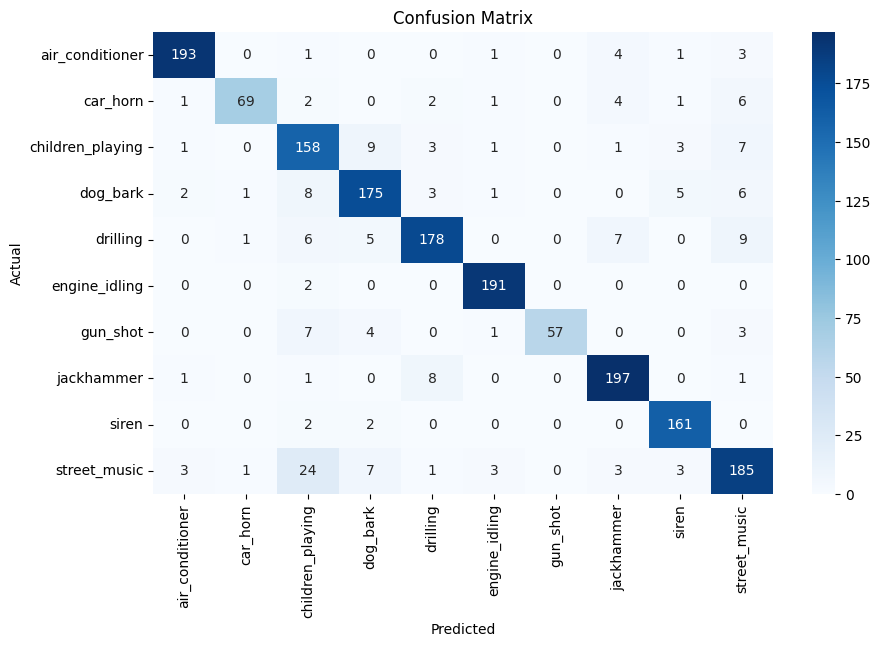

In [12]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Detailed classification report
print("\n📊 Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=le.classes_, 
            yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [13]:
!pip install joblib


In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create and train the model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict
y_pred = rf.predict(X_test)

# Accuracy
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))


Random Forest Accuracy: 0.8952489982827705


In [17]:
import joblib

joblib.dump(rf, "random_forest_model.pkl")
print("✅ Model saved as random_forest_model.pkl")


✅ Model saved as random_forest_model.pkl


In [18]:
loaded_model = joblib.load("random_forest_model.pkl")

# Predict with the loaded model
y_pred_single = loaded_model.predict([X_test[0]])
print("Predicted:", le.inverse_transform(y_pred_single))
print("Actual:", le.inverse_transform([y_test[0]]))


Predicted: ['siren']
Actual: ['siren']


In [19]:
# Path to a new audio file (not from training)
new_file = r"C:\Users\meher\OneDrive\Desktop\internship project\week1\archive\fold5\100263-2-0-121.wav"

# Extract features
new_features = extract_features(new_file)

if new_features is not None:
    # Reshape because the model expects 2D array
    new_features = new_features.reshape(1, -1)

    # Predict using loaded model
    prediction = loaded_model.predict(new_features)
    predicted_class = le.inverse_transform(prediction)

    print("🎵 Predicted Class:", predicted_class[0])


🎵 Predicted Class: children_playing


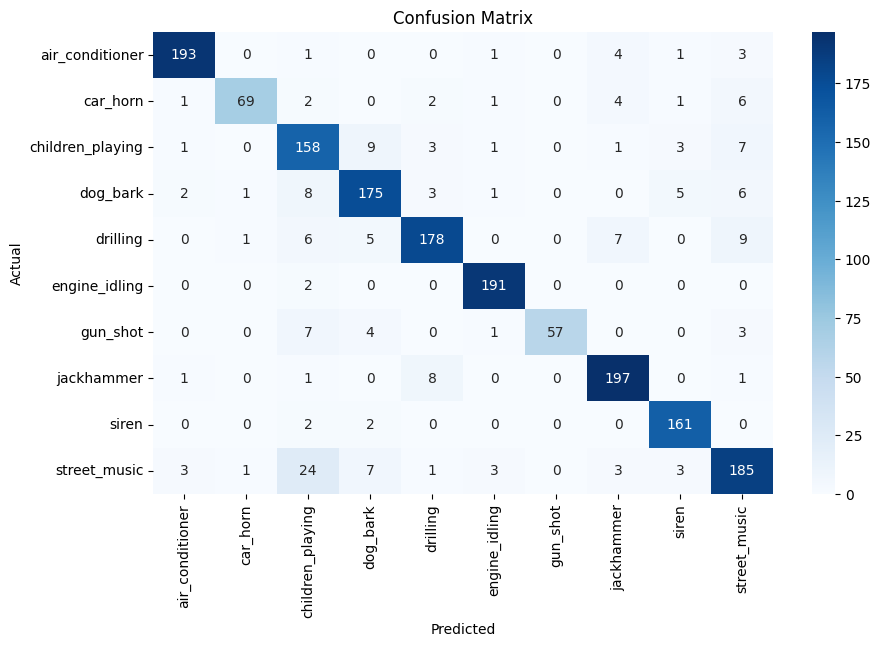


Classification Report:

                  precision    recall  f1-score   support

 air_conditioner       0.96      0.95      0.96       203
        car_horn       0.96      0.80      0.87        86
children_playing       0.75      0.86      0.80       183
        dog_bark       0.87      0.87      0.87       201
        drilling       0.91      0.86      0.89       206
   engine_idling       0.96      0.99      0.97       193
        gun_shot       1.00      0.79      0.88        72
      jackhammer       0.91      0.95      0.93       208
           siren       0.93      0.98      0.95       165
    street_music       0.84      0.80      0.82       230

        accuracy                           0.90      1747
       macro avg       0.91      0.89      0.89      1747
    weighted avg       0.90      0.90      0.90      1747



In [20]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))


In [21]:
import sounddevice as sd
import numpy as np
import librosa

# Function to record audio
def record_audio(duration=3, sr=22050):
    print("🎙️ Recording...")
    recording = sd.rec(int(duration * sr), samplerate=sr, channels=1, dtype="float32")
    sd.wait()  # Wait until recording is finished
    print("✅ Recording finished")
    return np.squeeze(recording), sr

# Function to predict real-time audio
def predict_realtime(duration=3):
    audio, sr = record_audio(duration)
    
    # Extract MFCC features
    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=40)
    mfccs_scaled = np.mean(mfccs.T, axis=0).reshape(1, -1)
    
    # Predict
    prediction = loaded_model.predict(mfccs_scaled)
    predicted_class = le.inverse_transform(prediction)
    
    print("🎵 Predicted Sound:", predicted_class[0])

# Example: record 3 sec and predict
predict_realtime(duration=3)


🎙️ Recording...
✅ Recording finished
🎵 Predicted Sound: dog_bark
